In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# lowercasing everything
df = pd.read_csv('spill_data/All_OilSpill.csv')

# Lowercase the column
df["text"] = df["text"].str.lower()

# Save the updated DataFrame back to the original CSV file
df.to_csv('spill_data/All_OilSpill.csv', index=False)

### practicing to plot on a small dataset: Oil

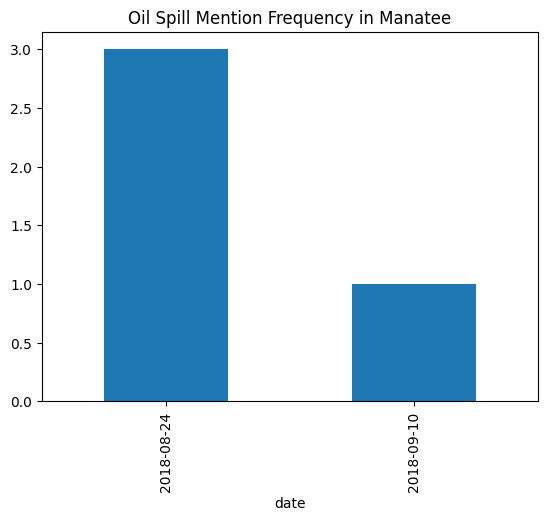

In [70]:
tf_path = "spill_data/OilSpill_Manatee_all_SIMPLE_columns.csv"
df = pd.read_csv(tf_path)

#print(df["created_at.x"])

# stripping the time mark and keeping only the date
df["created_at.x"] = df["created_at.x"].str.split().str[0]

#print(df["created_at.x"])

df["created_at.x"].value_counts().plot.bar()
plt.title("Oil Spill Mention Frequency in Manatee")
plt.xlabel("date")
plt.show()

### practicing on a bigger one: Industrial

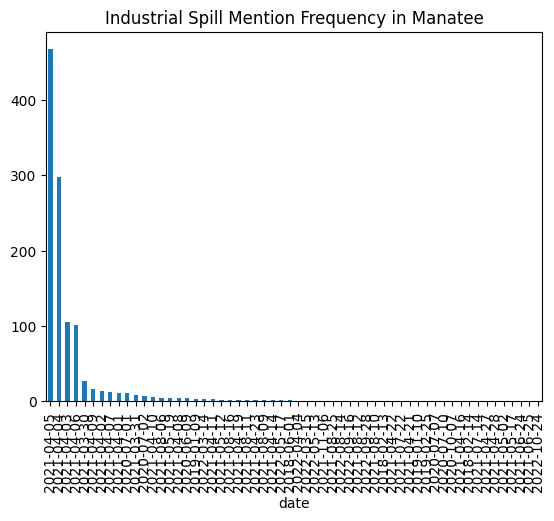

In [71]:

tf_path = "spill_data/IndustrialSpill_Manatee_all_SIMPLE_columns.csv"
df = pd.read_csv(tf_path)

# stripping the time mark and keeping only the date
df["created_at.x"] = df["created_at.x"].str.split().str[0]
date = df["created_at.x"]

date.value_counts().plot.bar()
plt.title("Industrial Spill Mention Frequency in Manatee")
plt.xlabel("date")
plt.show()

### formatting the date column

In [72]:
from datetime import datetime
import matplotlib.dates as mdates

df["created_at.x"] = df["created_at.x"].str.slice(0,10)

df['count'] = df.groupby('created_at.x')['created_at.x'].transform('count')

df['created_at.x'] = pd.to_datetime(df['created_at.x'])

date = df["created_at.x"]

count = df["count"]

### plotting the basic time series

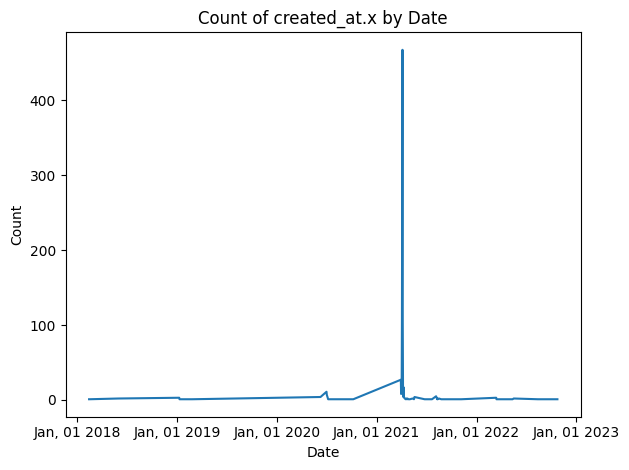

In [73]:
# Plottin the basic time series

# Format x-axis as dates
fig, ax = plt.subplots()
ax.plot(date, count)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b, %d %Y'))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of created_at.x by Date')
plt.tight_layout()
plt.show()

### filling in the days where there were no tweets

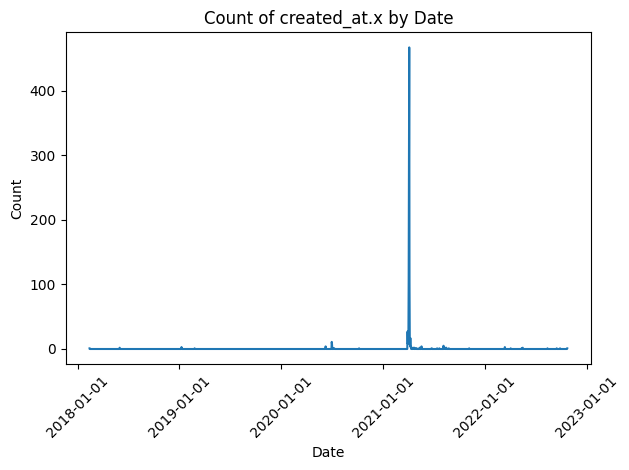

In [74]:
# filling in the days where there were no tweets

# Generate a date range covering the entire period
date_range = pd.date_range(start=date.min(), end=date.max())

# Create a DataFrame with the date range
date_df = pd.DataFrame(date_range, columns=['created_at.x'])

# Merge the original DataFrame with the date DataFrame, filling missing values with 0
merged_df = pd.merge(date_df, df.groupby('created_at.x').size().reset_index(name='count'), on='created_at.x', how='left').fillna(0)

# Plot
fig, ax = plt.subplots()
ax.plot(merged_df['created_at.x'], merged_df['count'])

# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of created_at.x by Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### So we got time series on an individual dataset and filled in the dates when there was no data recorded.
### Let's turn it into functions to be able to run it on anything more easily

In [75]:
# function: to create the frequency column of data(tweet) on a repective date
def get_date_count(df):
    df["created_at.x"] = df["created_at.x"].str.slice(0,10)

    df['count'] = df.groupby('created_at.x')['created_at.x'].transform('count')

    df['created_at.x'] = pd.to_datetime(df['created_at.x'])

    return df

# function: to fill in the daays where there was no data/tweet with 0
def fill_in_dates(df):
    # Extract the columns other than 'created_at.x'
    other_columns = df.drop(columns=['created_at.x', 'count'])
    # Generate a date range covering the entire period
    date_range = pd.date_range(start=df["created_at.x"].min(), end=df["created_at.x"].max())

    # Create a DataFrame with the date range
    date_df = pd.DataFrame(date_range, columns=['created_at.x'])

    # Merge the original DataFrame with the date DataFrame, filling missing values with 0
    merged_df = pd.merge(date_df, df.groupby('created_at.x').size().reset_index(name='count'), on='created_at.x', how='left').fillna(0)

    # Merge the modified DataFrame back with the original columns
    merged_df = pd.concat([other_columns, merged_df], axis=1)

    return merged_df

# function: to plot the time series of a tweet count
# param: can pass in the title of the plot if desired, otherwise called "Time Series"
def plot_time_series(df, title=None):
    fig, ax = plt.subplots()
    ax.plot(df['created_at.x'], df['count'])

    # Format x-axis as dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xlabel('Date')
    plt.ylabel('Count')
    if title:
        plt.title(title)
    else:
        plt.title('Time Series')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

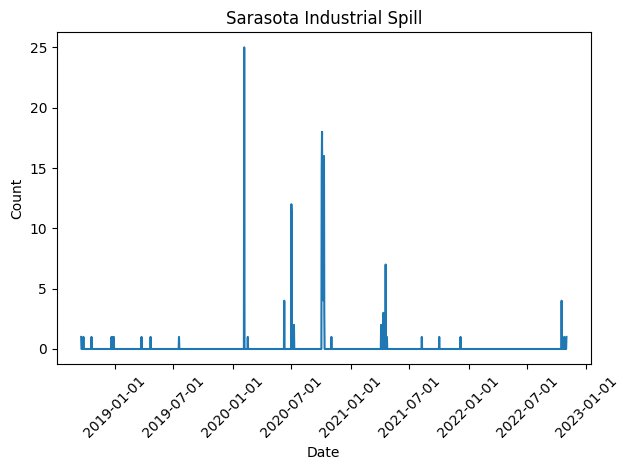

In [76]:
# example:

tf_path = "spill_data/IndustrialSpill_Sarasota_all_SIMPLE_columns.csv"
df = pd.read_csv(tf_path)

df = get_date_count(df)

df = fill_in_dates(df)

plot_time_series(df, 'Sarasota Industrial Spill')

### Combining datasets of the same type

function

In [77]:
import os

# function: combines all the files in a folder that starts with the file_name passed
# and creates a new csv file with the new name passed
# !drops duplicates!
def file_combiner(folder, file_name, new_file_name):

    # Getting all the files in the spill data
    all_files = os.listdir(folder)

    # Filter files that start with "oil"
    files = [file for file in all_files if file.startswith(file_name)]

    dfs = []

    # Read each file and append its DataFrame to the list
    for file in files:
        file_path = os.path.join(folder, file)
        df = pd.read_csv(file_path)
        dfs.append(df)

    # Concatenate all DataFrames into one
    combined_df = pd.concat(dfs, ignore_index=True)

    # removing duplicates
    combined_df = combined_df.drop_duplicates()

    # Save the combined DataFrame to a CSV file
    combined_df.to_csv(f"spill_data/{new_file_name}.csv", index=False)

running it on datasets

In [78]:
# Oil
file_combiner("spill_data", "OilSpill", "All_OilSpill")
# Industrial
file_combiner("spill_data", "IndustrialSpill", "All_IndustrialSpill")
# Sewage
file_combiner("spill_data", "SewageSpill", "All_SewageSpill")
# RedTide
file_combiner("spill_data", "RedTide", "All_RedTide")

/var/folders/v1/dkrd1tzx2cvd0z9f5pbj8xp00000gn/T/ipykernel_61945/2269797588.py:19: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


### Great, now let's plot all three types of spill and label them 

### With RTs

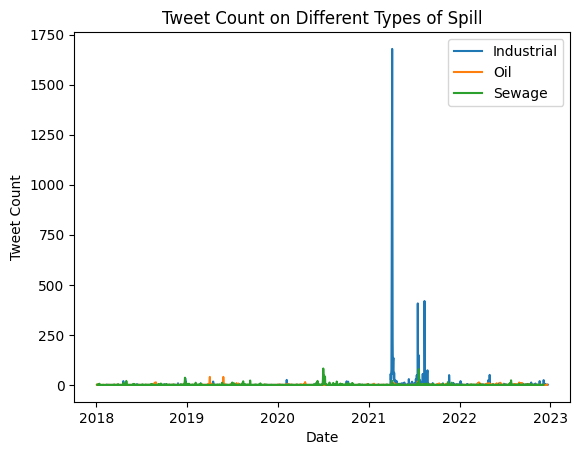

In [79]:
# Load the first CSV file
Industrial = pd.read_csv('spill_data/All_IndustrialSpill.csv')
Industrial = get_date_count(Industrial)
Industrial = fill_in_dates(Industrial)

# Load the second CSV file
Oil = pd.read_csv('spill_data/All_OilSpill.csv')
Oil = get_date_count(Oil)
Oil = fill_in_dates(Oil)

# Load the third CSV file
Sewage = pd.read_csv('spill_data/All_SewageSpill.csv')
Sewage = get_date_count(Sewage)
Sewage = fill_in_dates(Sewage)

# Extract columns to plot from the first and second CSV files
x1 = Industrial['created_at.x']
y1 = Industrial['count']

x2 = Oil['created_at.x']
y2 = Oil['count']

x3 = Sewage['created_at.x']
y3 = Sewage['count']

# Plot the first and second columns
plt.plot(x1, y1, label='Industrial')
plt.plot(x2, y2, label='Oil')
plt.plot(x3, y3, label='Sewage')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Tweet Count on Different Types of Spill')

# Add legend
plt.legend()

# Show plot
plt.show()

### Only Original Tweets

In [80]:
# function: Removing RT data
def remove_RT(df, file_name):
    # Filter out rows where the text column starts with 'RT @'
    df = df[~df['text'].astype(str).str.startswith('RT @')]
    # Save the filtered DataFrame back to the CSV file
    df.to_csv(f"spill_data/NORT_{file_name}.csv", index=False)
    return df

# Load the first CSV file
Industrial = pd.read_csv('spill_data/All_IndustrialSpill.csv')
Industrial = get_date_count(Industrial)
Industrial = fill_in_dates(Industrial)
Industrial = remove_RT(Industrial, 'Industrial')

# Load the second CSV file
Oil = pd.read_csv('spill_data/All_OilSpill.csv')
Oil = get_date_count(Oil)
Oil = fill_in_dates(Oil)
Oil = remove_RT(Oil, 'Oil')

# Load the third CSV file
Sewage = pd.read_csv('spill_data/All_SewageSpill.csv')
Sewage = get_date_count(Sewage)
Sewage = fill_in_dates(Sewage)
Sewage = remove_RT(Sewage, 'Sewage')

# Load Red Tide file
RedTide = pd.read_csv('spill_data/All_RedTide.csv')
RedTide = get_date_count(RedTide)
RedTide = fill_in_dates(RedTide)
RedTide = remove_RT(RedTide, 'RedTide')

# Extract columns to plot from the first and second CSV files
x1 = Industrial['created_at.x']
y1 = Industrial['count']

x2 = Oil['created_at.x']
y2 = Oil['count']

x3 = Sewage['created_at.x']
y3 = Sewage['count']

x4 = RedTide['created_at.x']
y4 = RedTide['count']

/var/folders/v1/dkrd1tzx2cvd0z9f5pbj8xp00000gn/T/ipykernel_61945/1441446644.py:28: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  RedTide = pd.read_csv('spill_data/All_RedTide.csv')


# Plotting only the Spill

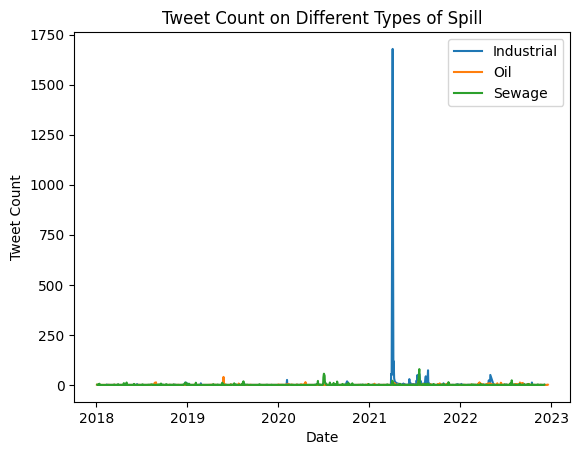

In [81]:
# Plot the first and second columns
plt.plot(x1, y1, label='Industrial')
plt.plot(x2, y2, label='Oil')
plt.plot(x3, y3, label='Sewage')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Tweet Count on Different Types of Spill')

# Add legend
plt.legend()

# Show plot
plt.show()

# Plotting Spill & Red Tide

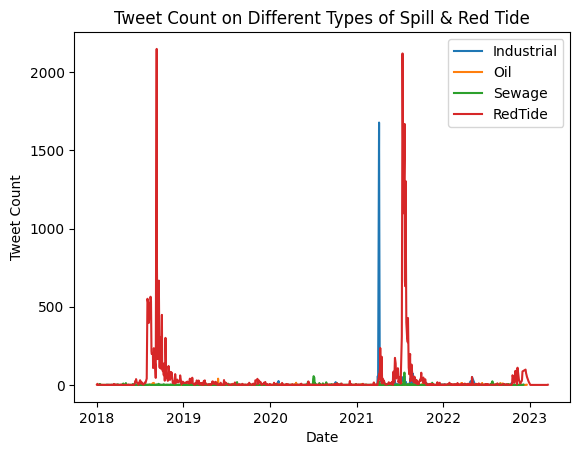

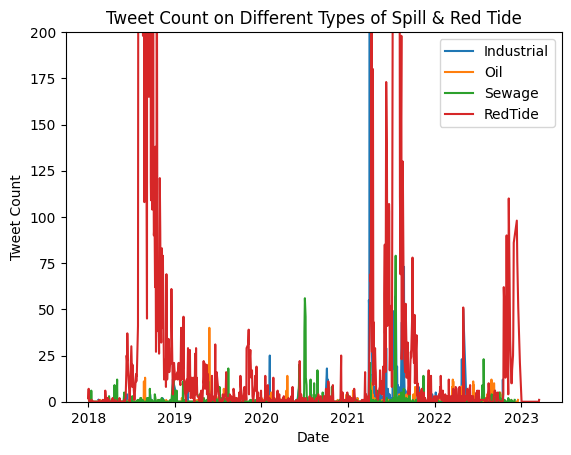

In [82]:
# Plot the first and second columns
plt.plot(x1, y1, label='Industrial')
plt.plot(x2, y2, label='Oil')
plt.plot(x3, y3, label='Sewage')
plt.plot(x4, y4, label='RedTide')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Tweet Count on Different Types of Spill & Red Tide')

# Add legend
plt.legend()

# Show plot
plt.show()


# Plot the first and second columns
plt.plot(x1, y1, label='Industrial')
plt.plot(x2, y2, label='Oil')
plt.plot(x3, y3, label='Sewage')
plt.plot(x4, y4, label='RedTide')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Tweet Count on Different Types of Spill & Red Tide')
plt.ylim(0,200)
# Add legend
plt.legend()

# Show plot
plt.show()

# Industrial Spill & Red Tide

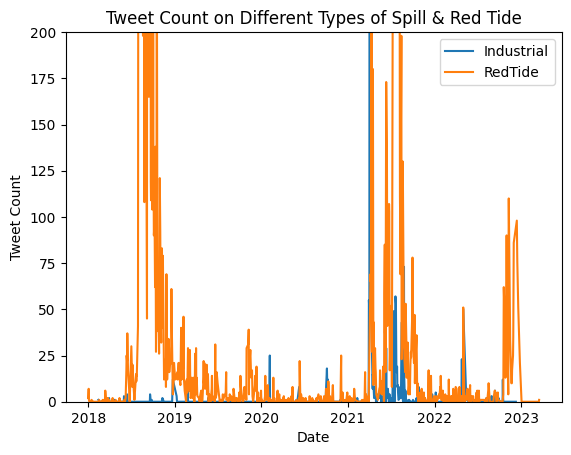

In [83]:
# Plot the first and second columns
plt.plot(x1, y1, label='Industrial')
plt.plot(x4, y4, label='RedTide')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Tweet Count on Different Types of Spill & Red Tide')
plt.ylim(0,200)
# Add legend
plt.legend()

# Show plot
plt.show()

Piney Point is the event that caused the red tide in 2021

The Red Tide peek in the middle of 2022-2023 seems to be related to Industrial

# Sewage & Red Tide

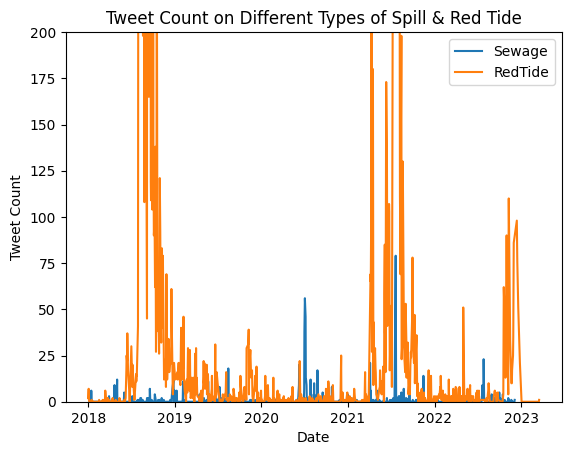

In [84]:
# Plot the first and second columns
plt.plot(x3, y3, label='Sewage')
plt.plot(x4, y4, label='RedTide')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Tweet Count on Different Types of Spill & Red Tide')
plt.ylim(0,200)
# Add legend
plt.legend()

# Show plot
plt.show()

the sewage peek in mid 2020-2021 is related to Port Richey: https://www.abcactionnews.com/news/local-news/i-team-investigates/port-richey-neighbors-fed-up-with-ongoing-sewage-spills

# Oil & Red Tide

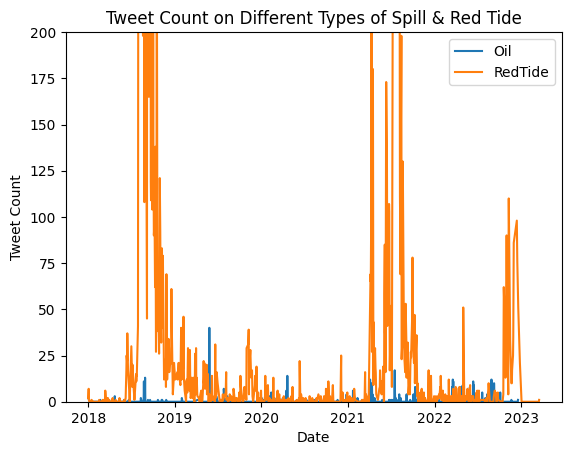

In [85]:
plt.plot(x2, y2, label='Oil')
plt.plot(x4, y4, label='RedTide')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Tweet Count on Different Types of Spill & Red Tide')
plt.ylim(0,200)
# Add legend
plt.legend()

# Show plot
plt.show()

The peek in the middle of 2019-2020 seems to be related to oil

# Word Cloud Preparation

In [86]:
import re
import spacy

import nltk
from nltk.stem import WordNetLemmatizer
import ssl

# my computer had some error downloading with ssl certification on so i turned it off
'''
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

'''
#nltk.download('popular')
'''
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')'''
from nltk.corpus import wordnet
import nltk

1. Remove "https.*/"http."
2. Remove "RT@username"
3. Remove "@username"
4. Replace "-" with " " (space)
5. Remove trailing spaces at the end
6. Replacing "’" with "'" -> making apostrophes consistent
7. Removing "'" from words where it indicates "is" rather than possesive (e.g. "she's" -> shes BUT not touching stuff like "florida's")
8. Doing the following regex for "'s": str_replace.all("('s)(^a-zA-Z0-9)", "\\2")
9. Lemmatizing the strings via textstem's (R package) function "lemmatize_strings" -> this should remove punctuation
10. removing stop words
12. decide how to process emojis(keep them? how to read them?)

**<p>! lemmatization can turn media into medium, avoid this</p>**

Resources:
Re library: https://docs.python.org/3/library/re.html
https://chatgpt.com/share/557000f6-79cd-4fc9-bfd8-ebc338d5c3b3

We will start and practice with Oil set since it is the smallest.

In [87]:
oil_spill = pd.read_csv("spill_data/All_OilSpill.csv")

## 1. Remove "https.*/"http."

In [88]:
def clean_text(text):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'http\S+|www\S+|com\S+|https\S+')
    
    # Remove URLs from the text
    cleaned_text = re.sub(url_pattern, '', text)
    
    # Remove common URL-related words using word boundaries
    common_words = ['http', 'https', 'www', 'com', 'news', 'org', 'post', 'edu', 'status', 'twitter', 'Reposting']
    for word in common_words:
        cleaned_text = re.sub(r'\b' + word + r'\b', '', cleaned_text)
    
    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split()) 
    
    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split())
    
    return cleaned_text



creating dataframe with cleaned version

In [89]:
# Copy the DataFrame
df_cleaned1 = oil_spill.copy()

# Apply the cleaning function to the specific column
df_cleaned1['text'] = df_cleaned1['text'].apply(clean_text)

df_cleaned1.to_csv(f"spill_data/Clean_Oil/Clean1_OilSpill.csv", index=False)

## 2. Remove "RT@username"

In [90]:
def clean_text(text):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'http\S+|www\S+|com\S+|https\S+')
    """
    ****** URL + 'Reposting' ********
    """
    # Remove URLs from the text
    cleaned_text = re.sub(url_pattern, '', text)
    
    # Remove common URL-related words using word boundaries
    common_words = ['http', 'https', 'www', 'com', 'news', 'org', 'post', 'edu', 'status', 'twitter', 'reposting']
    for word in common_words:
        cleaned_text = re.sub(r'\b' + word + r'\b', '', cleaned_text)
    
    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split()) 
    
    """
    ****** RT ********
    """
    # Remove retweet patterns like "RT @username"
    rt_pattern = re.compile(r'rt|rt @\w+:?')
    cleaned_text = re.sub(rt_pattern, '', cleaned_text)
    
    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split())
    
    return cleaned_text


creating dataframe with cleaned version

In [91]:
# Copy the DataFrame
df_cleaned2= df_cleaned1.copy()

# Apply the cleaning function to the specific column
df_cleaned2['text'] = df_cleaned2['text'].apply(clean_text)

df_cleaned2.to_csv(f"spill_data/Clean_Oil/Clean2_OilSpill.csv", index=False)

## 3. Remove "@username"

In [92]:
def clean_text(text):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'http\S+|www\S+|com\S+|https\S+')
    """
    ****** URL + 'Reposting' ********
    """
    # Remove URLs from the text
    cleaned_text = re.sub(url_pattern, '', text)
    
    # Remove common URL-related words using word boundaries
    common_words = ['http', 'https', 'www', 'com', 'news', 'org', 'post', 'edu', 'status', 'twitter', 'Reposting']
    for word in common_words:
        cleaned_text = re.sub(r'\b' + word + r'\b', '', cleaned_text)
    
    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split()) 
    
    """
    ****** RT ********
    """
    # Remove retweet patterns like "RT @username"
    rt_pattern = re.compile(r'rt|rt @\w+:?')
    cleaned_text = re.sub(rt_pattern, '', cleaned_text)
    
    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split())
    
    """
    ****** Username ********
    """
    # Remove username patterns like "@username:"
    username_pattern = re.compile(r'@\w+:?')
    cleaned_text = re.sub(username_pattern, '', cleaned_text)
    
    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split())
    
    return cleaned_text

creating dataframe with cleaned version

In [93]:
# Copy the DataFrame
df_cleaned3= df_cleaned2.copy()

# Apply the cleaning function to the specific column
df_cleaned3['text'] = df_cleaned3['text'].apply(clean_text)

df_cleaned3.to_csv(f"spill_data/Clean_Oil/Clean3_OilSpill.csv", index=False)

## 4. Replace "-" with " " (space)

In [94]:
def clean_text(text):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'http\S+|www\S+|com\S+|https\S+')
    """
    ****** URL + 'Reposting' ********
    """
    # Remove URLs from the text
    cleaned_text = re.sub(url_pattern, '', text)
    
    # Remove common URL-related words using word boundaries
    common_words = ['http', 'https', 'www', 'com', 'news', 'org', 'post', 'edu', 'status', 'twitter', 'Reposting']
    for word in common_words:
        cleaned_text = re.sub(r'\b' + word + r'\b', '', cleaned_text)
    
    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split()) 
    
    """
    ****** RT ********
    """
    # Remove retweet patterns like "RT @username"
    rt_pattern = re.compile(r'rt|rt @\w+:?')
    cleaned_text = re.sub(rt_pattern, '', cleaned_text)
    
    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split())
    
    """
    ****** Username ********
    """
    # Remove username patterns like "@username:"
    username_pattern = re.compile(r'@\w+:?')
    cleaned_text = re.sub(username_pattern, '', cleaned_text)
    
    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split())
    
    """
    ****** "-"" replacement ********
    """

    # Replace hyphens with whitespace
    cleaned_text = cleaned_text.replace('-', ' ')
    cleaned_text = cleaned_text.replace('—', ' ')
    
    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split())

    return cleaned_text

creating dataframe with cleaned version

In [95]:
# Copy the DataFrame
df_cleaned4= df_cleaned3.copy()

# Apply the cleaning function to the specific column
df_cleaned4['text'] = df_cleaned4['text'].apply(clean_text)

df_cleaned4.to_csv(f"spill_data/Clean_Oil/Clean4_OilSpill.csv", index=False)

## 5. Remove leading & trailing spaces at the end

In [96]:
def clean_text(text):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'http\S+|www\S+|com\S+|https\S+')
    """
    ****** URL + 'Reposting' ********
    """
    # Remove URLs from the text
    cleaned_text = re.sub(url_pattern, '', text)
    
    # Remove common URL-related words using word boundaries
    common_words = ['http', 'https', 'www', 'com', 'news', 'org', 'post', 'edu', 'status', 'twitter', 'reposting']
    for word in common_words:
        cleaned_text = re.sub(r'\b' + word + r'\b', '', cleaned_text)
    
    """
    ****** RT ********
    """
    # Remove retweet patterns like "RT @username"
    rt_pattern = re.compile(r'rt|rt @\w+:?')
    cleaned_text = re.sub(rt_pattern, '', cleaned_text)
    
    """
    ****** Username ********
    """
    # Remove username patterns like "@username:"
    username_pattern = re.compile(r'@\w+:?')
    cleaned_text = re.sub(username_pattern, '', cleaned_text)
    
    """
    ****** "-"" replacement ********
    """

    # Replace hyphens with whitespace
    cleaned_text = cleaned_text.replace('-', ' ')
    cleaned_text = cleaned_text.replace('—', ' ')
    
    """
    ****** Removing Leading and Trailing Space ********
    """
    cleaned_text = cleaned_text.strip()

    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split())

    return cleaned_text

creating dataframe with cleaned version

In [97]:
# Copy the DataFrame
df_cleaned5= df_cleaned4.copy()

# Apply the cleaning function to the specific column
df_cleaned5['text'] = df_cleaned5['text'].apply(clean_text)

df_cleaned5.to_csv(f"spill_data/Clean_Oil/Clean5_OilSpill.csv", index=False)

## 6. Replacing "’" with "'" -> making apostrophes consistent

In [98]:
def clean_text(text):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'http\S+|www\S+|com\S+|https\S+')
    """
    ****** URL + 'Reposting' ********
    """
    # Remove URLs from the text
    cleaned_text = re.sub(url_pattern, '', text)
    
    # Remove common URL-related words using word boundaries
    common_words = ['http', 'https', 'www', 'com', 'news', 'org', 'post', 'edu', 'status', 'twitter', 'reposting']
    for word in common_words:
        cleaned_text = re.sub(r'\b' + word + r'\b', '', cleaned_text)
    
    """
    ****** RT ********
    """
    # Remove retweet patterns like "RT @username"
    rt_pattern = re.compile(r'rt|rt @\w+:?')
    cleaned_text = re.sub(rt_pattern, '', cleaned_text)
    """
    ****** Username ********
    """
    # Remove username patterns like "@username:"
    username_pattern = re.compile(r'@\w+:?')
    cleaned_text = re.sub(username_pattern, '', cleaned_text)
    
    """
    ****** "-"" replacement ********
    """

    # Replace hyphens with whitespace
    cleaned_text = cleaned_text.replace('-', ' ')
    cleaned_text = cleaned_text.replace('—', ' ')
    
    """
    ****** Removing Leading and Trailing Space ********
    """

    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split())

    """
    ****** Replacing ’ with ' ********
    """
    cleaned_text = cleaned_text.replace('’', "'")

    return cleaned_text

creating dataframe with cleaned version

In [99]:
# Copy the DataFrame
df_cleaned6= df_cleaned5.copy()

# Apply the cleaning function to the specific column
df_cleaned6['text'] = df_cleaned6['text'].apply(clean_text)

df_cleaned6.to_csv(f"spill_data/Clean_Oil/Clean6_OilSpill.csv", index=False)

## 7. Removing "'" from words where it indicates "is" rather than possesive (e.g. "she's" -> shes BUT not touching stuff like "florida's")

In [100]:
def clean_text(text):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'http\S+|www\S+|com\S+|https\S+')
    """
    ****** URL + 'Reposting' ********
    """
    # Remove URLs from the text
    cleaned_text = re.sub(url_pattern, '', text)
    
    # Remove common URL-related words using word boundaries
    common_words = ['http', 'https', 'www', 'com', 'news', 'org', 'post', 'edu', 'status', 'twitter', 'reposting']
    for word in common_words:
        cleaned_text = re.sub(r'\b' + word + r'\b', '', cleaned_text)
    
    """
    ****** RT ********
    """
    # Remove retweet patterns like "RT @username"
    rt_pattern = re.compile(r'rt|rt @\w+:?')
    cleaned_text = re.sub(rt_pattern, '', cleaned_text)
    """
    ****** Username ********
    """
    # Remove username patterns like "@username:"
    username_pattern = re.compile(r'@\w+:?')
    cleaned_text = re.sub(username_pattern, '', cleaned_text)
    
    """
    ****** "-"" replacement ********
    """

    # Replace hyphens with whitespace
    cleaned_text = cleaned_text.replace('-', ' ')
    cleaned_text = cleaned_text.replace('—', ' ')
    
    """
    ****** Removing Leading and Trailing Space ********
    """

    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split())

    """
    ****** Replacing ’ with ' ********
    """
    cleaned_text = cleaned_text.replace('’', "'")

    """
    ****** Removing Contractions Apostrophes ********
    """
    common_words = ["she's", "he's", "it's"]
    for word in common_words:
        # Escapes any special characters in the word to ensure they are treated as literal characters in the regex pattern.
        cleaned_text = re.sub(r'\b' + re.escape(word) + r'\b', word.replace("'", ""), cleaned_text)

    return cleaned_text

creating dataframe with cleaned version

In [101]:
# Copy the DataFrame
df_cleaned7 = df_cleaned6.copy()

# Apply the cleaning function to the specific column
df_cleaned7['text'] = df_cleaned7['text'].apply(clean_text)

df_cleaned7.to_csv(f"spill_data/Clean_Oil/Clean7_OilSpill.csv", index=False)

## 8. Remove "'s" from rest of the possesive words

doesn't remove Land O'Lakes

In [105]:
def clean_text(text):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'http\S+|www\S+|com\S+|https\S+')
    """
    ****** URL + 'Reposting' ********
    """
    # Remove URLs from the text
    cleaned_text = re.sub(url_pattern, '', text)
    
    # Remove common URL-related words using word boundaries
    common_words = ['http', 'https', 'www', 'com', 'news', 'org', 'post', 'edu', 'status', 'twitter', 'reposting']
    for word in common_words:
        cleaned_text = re.sub(r'\b' + word + r'\b', '', cleaned_text)
    
    """
    ****** RT ********
    """
    # Remove retweet patterns like "RT @username"
    rt_pattern = re.compile(r'rt|rt @\w+:?')
    cleaned_text = re.sub(rt_pattern, '', cleaned_text)
    """
    ****** Username ********
    """
    # Remove username patterns like "@username:"
    username_pattern = re.compile(r'@\w+:?')
    cleaned_text = re.sub(username_pattern, '', cleaned_text)
    
    """
    ****** "-"" replacement ********
    """

    # Replace hyphens with whitespace
    cleaned_text = cleaned_text.replace('-', ' ')
    cleaned_text = cleaned_text.replace('—', ' ')
    
    """
    ****** Removing Leading and Trailing Space ********
    """

    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split())

    """
    ****** Replacing ’ with ' ********
    """
    cleaned_text = cleaned_text.replace('’', "'")

    """
    ****** Removing Contractions Apostrophes ********
    """
    common_words = ["she's", "he's", "it's"]
    for word in common_words:
        # Escapes any special characters in the word to ensure they are treated as literal characters in the regex pattern.
        cleaned_text = re.sub(r'\b' + re.escape(word) + r'\b', word.replace("'", ""), cleaned_text)

    """
    ****** Remove "'s" from rest of the possesive words ********
    """
    cleaned_text = re.sub(r"(\w+)'s\b", word.replace("'s", ""), cleaned_text)

    return cleaned_text

creating dataframe with cleaned version

In [106]:
# Copy the DataFrame
df_cleaned8 = df_cleaned7.copy()

# Apply the cleaning function to the specific column
df_cleaned8['text'] = df_cleaned8['text'].apply(clean_text)

df_cleaned8.to_csv(f"spill_data/Clean_Oil/Clean8_OilSpill.csv", index=False)

## 9. removing stop words

resource: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

In [135]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
 
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    tokenizer = RegexpTokenizer(r'\b\w+\b')
    word_tokens = tokenizer.tokenize(text.lower())
    other_stop_words = ['govrondesantis','linbia', 'beaches', 'county',
        'hillsborough',
        'counties','a',"a're" 'and', 'the', 'if', 'it', 'is', 'with', 'na', 'in', 'com', 'https', 'http', '.', 'of', 'to', 'www', 'on',
        "https", "http", "video", "image", "photo", "'", "news", "html", "com", "www",
        "storylink",
        "usf", "wusf", "edu", "cameron", "camerin", "herrin",
        "camerinherrin","cameronherrin",
        'rt', 'at', '!', '$', '%', '(', ')', '.', ':', ';', '?','#', ',', '[', ']', '{', '|', '}', 'or', 'i', '-', '&amp;', 'justiceforcameronherrin', 
        'fvcked', 'desantis', 'deathsantis', 'demcastfl', '"', "n't", "”", "“", "w/", "", "u", "via", "still"]
    # converts the words in word_tokens to lower case and then checks whether 
    #they are present in stop_words or not
    filtered_sentence = [w for w in word_tokens if w not in stop_words and other_stop_words]
    #with no lower case conversion
    filtered_sentence = []
    
    for w in word_tokens:
        if w not in stop_words and w not in other_stop_words:
            filtered_sentence.append(w)

    filtered_sentence = " ".join(filtered_sentence)
    return filtered_sentence

In [120]:
text = "hello we're here"
new_text = remove_stop_words(text)
print(new_text)

hello 're


In [121]:
def clean_text(text):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'http\S+|www\S+|com\S+|https\S+')
    """
    ****** URL + 'Reposting' ********
    """
    # Remove URLs from the text
    cleaned_text = re.sub(url_pattern, '', text)
    
    # Remove common URL-related words using word boundaries
    common_words = ['http', 'https', 'www', 'com', 'news', 'org', 'post', 'edu', 'status', 'twitter', 'Reposting']
    for word in common_words:
        cleaned_text = re.sub(r'\b' + word + r'\b', '', cleaned_text)
    
    """
    ****** RT ********
    """
    # Remove retweet patterns like "RT @username"
    rt_pattern = re.compile(r'RT|RT @\w+:?')
    cleaned_text = re.sub(rt_pattern, '', cleaned_text)
    """
    ****** Username ********
    """
    # Remove username patterns like "@username:"
    username_pattern = re.compile(r'@\w+:?')
    cleaned_text = re.sub(username_pattern, '', cleaned_text)
    
    """
    ****** "-"" replacement ********
    """

    # Replace hyphens with whitespace
    cleaned_text = cleaned_text.replace('-', ' ')
    cleaned_text = cleaned_text.replace('—', ' ')
    
    """
    ****** Removing Leading and Trailing Space ********
    """

    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split())

    """
    ****** Replacing ’ with ' ********
    """
    cleaned_text = cleaned_text.replace('’', "'")

    """
    ****** Removing Contractions Apostrophes ********
    """
    common_words = ["she's", "he's", "it's", "He's","She's", "It's"]
    for word in common_words:
        # Escapes any special characters in the word to ensure they are treated as literal characters in the regex pattern.
        cleaned_text = re.sub(r'\b' + re.escape(word) + r'\b', word.replace("'", ""), cleaned_text)

    """
    ****** Remove "'s" from rest of the possesive words ********
    """
    cleaned_text = re.sub(r"(\w+)'s\b", word.replace("'s", ""), cleaned_text)

    
    """
    ****** Remmoving Stop Words ********
    """
    cleaned_text = remove_stop_words(cleaned_text)

    return cleaned_text

creating dataframe with cleaned version

In [ ]:
# Copy the DataFrame
df_cleaned9 = df_cleaned8.copy()

# Apply the cleaning function to the specific column
df_cleaned9['text'] = df_cleaned9['text'].apply(clean_text)

df_cleaned9.to_csv(f"spill_data/Clean_Oil/Clean9_OilSpill.csv", index=False)

## 10. lemmatization

#### resource: the 2nd one https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/

In [122]:
lemmatizer = WordNetLemmatizer()
 

# Define function to lemmatize each word with its POS tag
 
# POS_TAGGER_FUNCTION : TYPE 1
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ #adjectice
    elif nltk_tag.startswith('V'):
        return wordnet.VERB #verb
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN #noun
    elif nltk_tag.startswith('R'):
        return wordnet.ADV #adverb
    else:          
        return None


def simple_lemmatizer(text):
    # since the below tags are little confusing...
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(text))  
    
    # ... we use our own pos_tagger function to make things simpler to understand.
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None or word == "media":
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))

    lemmatized_sentence = " ".join(lemmatized_sentence)
    return lemmatized_sentence

In [136]:
def clean_text(text):
    text = str(text).lower()
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'http\S+|www\S+|com\S+|https\S+')
    """
    ****** URL + 'reposting' ********
    """
    # Remove URLs from the text
    cleaned_text = re.sub(url_pattern, '', text)
    
    # Remove common URL-related words using word boundaries
    common_words = ['http', 'https', 'www', 'com', 'news', 'org', 'post', 'edu', 'status', 'twitter', 'reposting']
    for word in common_words:
        cleaned_text = re.sub(r'\b' + word + r'\b', '', cleaned_text)
    
    """
    ****** RT ********
    """
    # Remove retweet patterns like "RT @username"
    rt_pattern = re.compile(r'rt|rt @\w+:?')
    cleaned_text = re.sub(rt_pattern, '', cleaned_text)
    """
    ****** Username ********
    """
    # Remove username patterns like "@username:"
    username_pattern = re.compile(r'@\w+:?')
    cleaned_text = re.sub(username_pattern, '', cleaned_text)
    
    """
    ****** "-"" replacement ********
    """

    # Replace hyphens with whitespace
    cleaned_text = cleaned_text.replace('-', ' ')
    cleaned_text = cleaned_text.replace('—', ' ')
    
    """
    ****** Removing Leading and Trailing Space ********
    """

    # Remove extra spaces and clean up the text
    cleaned_text = ' '.join(cleaned_text.split())

    """
    ****** Replacing ’ with ' ********
    """
    cleaned_text = cleaned_text.replace('’', "'")

    """
    ****** Removing Contractions Apostrophes ********
    """
    common_words = ["she's", "he's", "it's"]
    for word in common_words:
        # Escapes any special characters in the word to ensure they are treated as literal characters in the regex pattern.
        cleaned_text = re.sub(r'\b' + re.escape(word) + r'\b', word.replace("'", ""), cleaned_text)
    """
    ****** Remove "'s" from rest of the possesive words ********
    """
    cleaned_text = re.sub(r"(\w+)'s\b", word.replace("'s", ""), cleaned_text)
    
    """
    ****** Remmoving Stop Words ********
    """
    cleaned_text = remove_stop_words(cleaned_text)
    
    """
    ****** Lemmatizing ********
    """
    cleaned_text = simple_lemmatizer(str(cleaned_text))

    return str(cleaned_text)

creating dataframe with cleaned version

In [110]:
# Copy the DataFrame
df_cleaned10 = df_cleaned9.copy()

# Apply the cleaning function to the specific column
df_cleaned10['text'] = df_cleaned10['text'].apply(clean_text)

df_cleaned10.to_csv(f"spill_data/Clean_Oil/Clean10_OilSpill.csv", index=False)

In [137]:
oil = pd.read_csv("spill_data/All_OilSpill.csv")
oil_processed = oil.copy()
oil_processed['text_with_display_links'] = oil_processed['text_with_display_links'].apply(clean_text)

oil_processed.to_csv(f"spill_data/Cleaned_files/C_All_Oil.csv", index=False)

In [129]:
sewage = pd.read_csv("spill_data/All_SewageSpill.csv")
sewage_processed = sewage.copy()
sewage_processed['text_with_display_links'] = sewage_processed['text_with_display_links'].apply(clean_text)

sewage_processed.to_csv(f"spill_data/Cleaned_files/C_All_Sewage.csv", index=False)

In [113]:
industrial = pd.read_csv("spill_data/All_IndustrialSpill.csv")
industrial_processed = oil.copy()
industrial_processed['text_with_display_links'] = industrial_processed['text_with_display_links'].apply(clean_text)

industrial_processed.to_csv(f"spill_data/Cleaned_files/C_All_Industrial.csv", index=False)

Fehmi's Stop words:
['@govrondesantis', 'raw', 'septic', 'chemicals', 'discharges', 'discharge', 'storm water', 'algae',
        'sewage', 'reclaimed water', 'crude', 'sewer', 'pumping', 'toxic', 'tar ball', 'sea',
        'pumps', 'discharged', 'cyanobacteria', 'oil', 'overflow', 'bay', 'blue green algae',
        'lake', 'chemical', 'leaking', 'beach', 'petroleum', 'lyngbya', 'kbrevis', 'dumping',
        'discharging', 'gulf', 'untreated', 'pump', 'spill', 'river', 'contaminating',
        'waterway', 'leaked', 'cyanotoxins', 'spilling', 'dump', 'contamination', 'spills',
        'ocean', 'linbya', 'red algae', 'red tide', 'lyngbia', 'harmful', 'bluegreenalgae',
        'toxicalgae', 'leaks', 'tar balls', 'kareniabrevis', 'harmfulalgae', 'spilled',
        'contaminants', 'linbia', 'beaches', 'oil spill', 'industrial spill', 'red tides',
        'dapis', 'wastewater', 'stormwater', 'reclaim water', 'leakage', 'bloom',
        'algae bloom',
        'blue green algal', 'raw sewage', 'oil leaks', 'oil spillage', 'county',
        'hillsborough',
        'counties','a', 'and', 'the', 'if', 'it', 'is', 'with', 'na', 'in', 'com', 'https', 'http', '.', 'of', 'to', 'www', 'on',
        "https", "http", "video", "image", "photo", "'", "news", "html", "com", "www",
        "storylink",
        "usf", "wusf", "edu", "red", "tide", "redtide", "cameron", "camerin", "herrin",
        "camerinherrin","cameronherrin", "justice",
        'rt', 'at', '!', '$', '%', '(', ')', '.', ':', ';', '?','#', ',', '[', ']', '{', '|', '}', 'or', 'i', '-', '&amp;', 'justiceforcameronherrin'];